In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as snn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier ##sklearn决策树算法
from Decisiontree_classify import DecisionTreeClassify  ##自己写的决策树算法
import utils

# 电离层数据集二分类

In [2]:
train = pd.read_excel('data/ionosphere_train.xlsx')
train = train.values
test = pd.read_excel('data/ionosphere_test.xlsx')
test = test.values
x_train = train[:,:-1]
y_train = train[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]
model_1 = DecisionTreeClassify(Post_prune=False)
model_1.fit(X_train=x_train,y_train=y_train)
y_pre1 = model_1.predict(X_test=x_test)
sklearn_model = DecisionTreeClassifier()
sklearn_model.fit(x_train,y_train)
y_pre_sklearn = sklearn_model.predict(x_test)
## 自编算法的性能
print('自编算法在测试集上的性能：')
print(classification_report(y_pre1,y_test))
print(accuracy_score(y_pre1,y_test))
print('sklearn模型在测试集上的性能')
print(classification_report(y_pre_sklearn,y_test))
print(accuracy_score(y_pre_sklearn,y_test))

自编算法在测试集上的性能：
              precision    recall  f1-score   support

           b       0.81      0.85      0.83        20
           g       0.94      0.92      0.93        49

    accuracy                           0.90        69
   macro avg       0.87      0.88      0.88        69
weighted avg       0.90      0.90      0.90        69

0.8985507246376812
sklearn模型在测试集上的性能
              precision    recall  f1-score   support

           b       0.81      0.81      0.81        21
           g       0.92      0.92      0.92        48

    accuracy                           0.88        69
   macro avg       0.86      0.86      0.86        69
weighted avg       0.88      0.88      0.88        69

0.8840579710144928


# 一些可视化

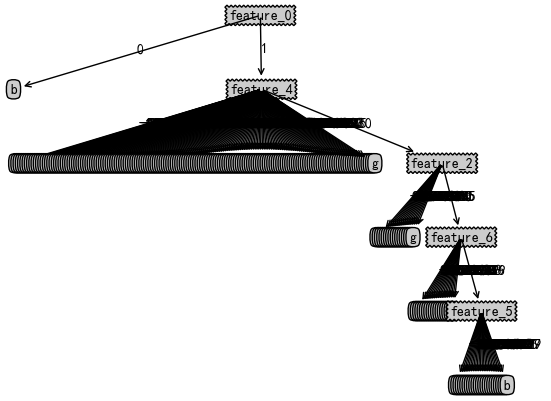

In [15]:
feature_name = ['feature_'+str(i) for i in range(x_train.shape[1])]
tree1 = model_1.C45_CreateTree(X=x_train,y=y_train,feature_names=feature_name)
utils.createPlot(tree1)

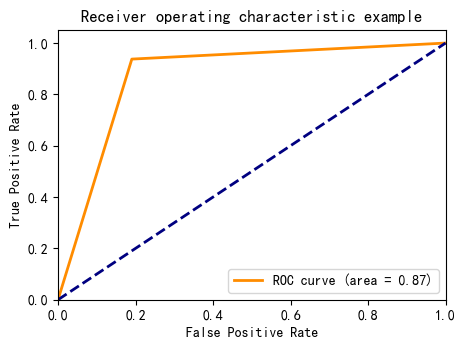

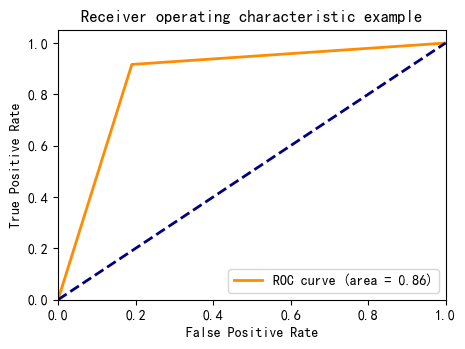

In [19]:
map = {'b':0,'g':1}
y_true = [map[i] for i in y_test]
y_pred = [map[i] for i in y_pre1]
y_pred_sklearn = [map[i] for i in y_pre_sklearn]
utils.roc_plot(y_true,y_pred)
utils.roc_plot(y_true,y_pred_sklearn)